In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
steam_games = pd.read_parquet('../datasets/steam_games.parquet')
users_items = pd.read_parquet('../datasets/users_items.parquet')
users_reviews = pd.read_parquet('../datasets/users_reviews.parquet')

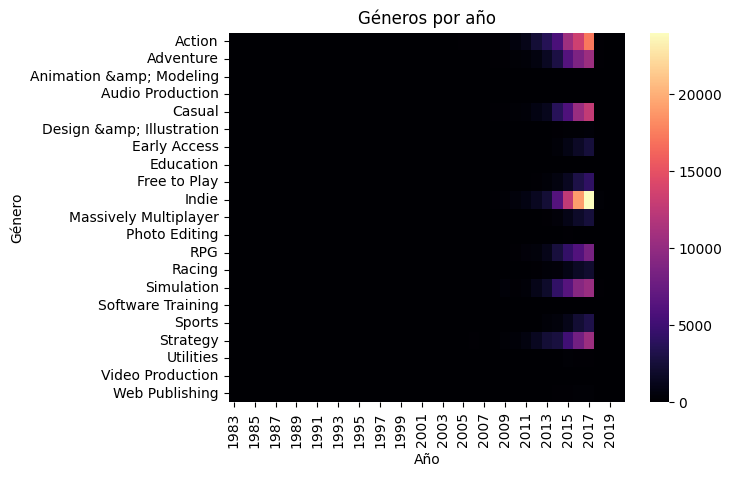

In [3]:
# Contar la cantidad de juegos por género y año.
genre_year_counts = steam_games.groupby(['genres', 'release_year']).size().unstack().fillna(0)

# Crear un mapa de calor para visualizar la relación.
sns.heatmap(genre_year_counts, cmap="magma")
plt.title("Géneros por año")
plt.xlabel("Año")
plt.ylabel("Género")
plt.show()

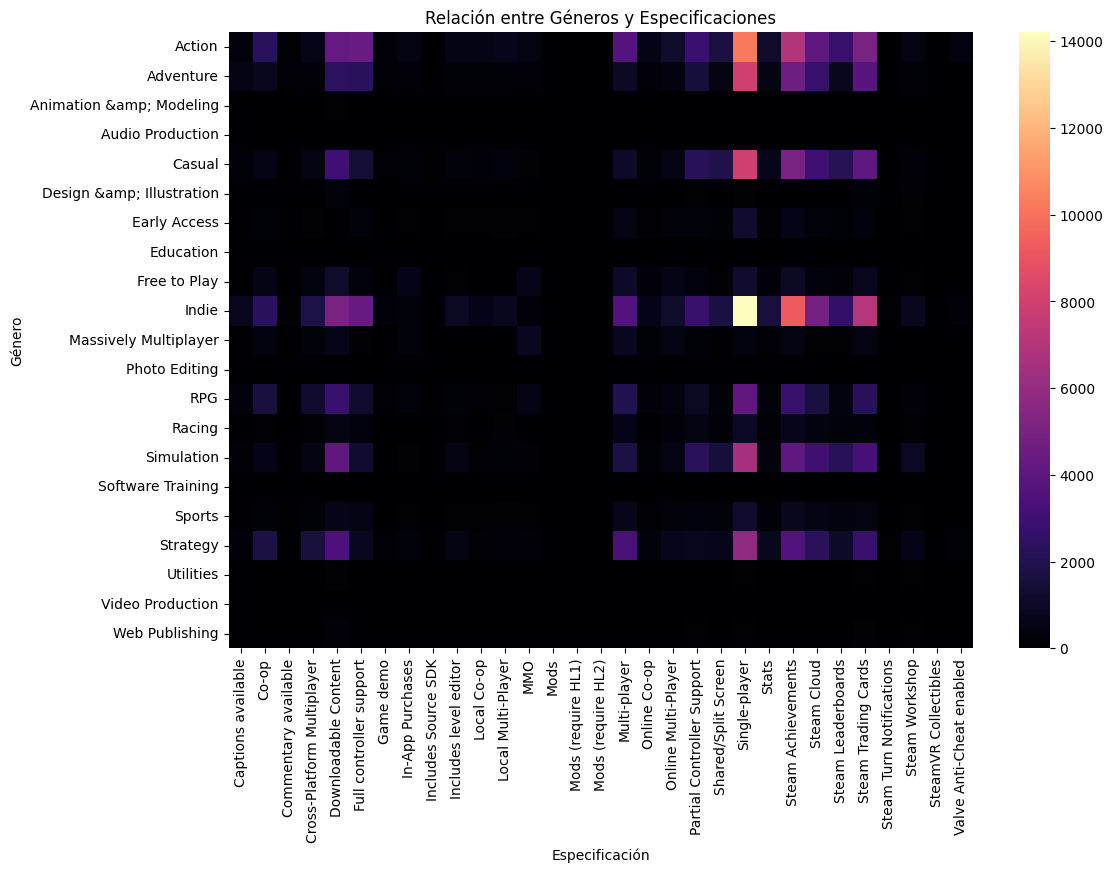

In [4]:
# Contar la cantidad de juegos por género y especificaciones (specs).
genre_specs_counts = steam_games.groupby(['genres', 'specs']).size().unstack().fillna(0)

# Crear un mapa de calor para visualizar la relación.
plt.figure(figsize=(12, 8))
sns.heatmap(genre_specs_counts, cmap="magma")
plt.title("Relación entre Géneros y Especificaciones")
plt.xlabel("Especificación")
plt.ylabel("Género")
plt.show()


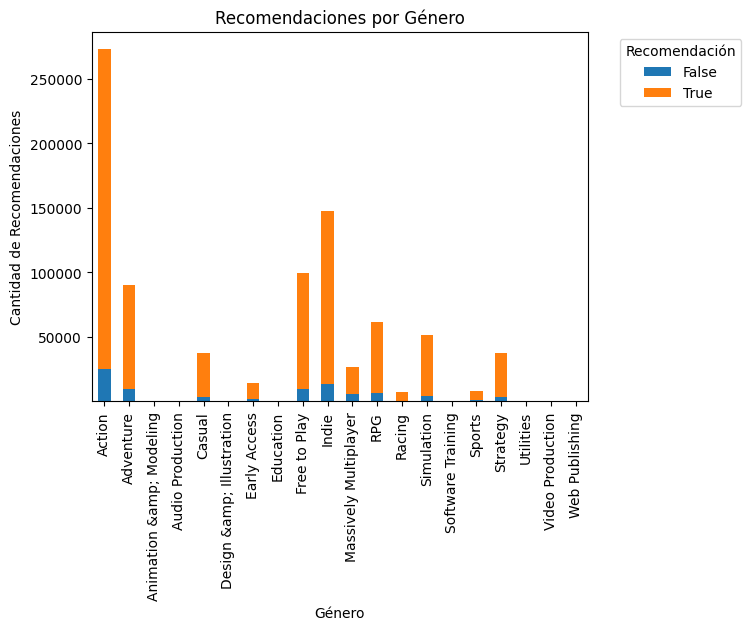

In [20]:
# Convertir 'item_id' a tipo de datos int32 en ambos Dataframes en caso que este como tipo de dato object
steam_games['item_id'] = steam_games['item_id'].astype('int32')
users_reviews['item_id'] = users_reviews['item_id'].astype('int32')
# Combina los dos csv en función del campo 'item_id'
merged_data = pd.merge(steam_games, users_reviews, on='item_id')
# Calcula la cantidad de recommend (True/False) por género
recommend_by_genre = merged_data.groupby(['genres', 'recommend']).size().unstack().fillna(0)

recommend_by_genre.plot(kind='bar', stacked=True)
plt.title("Recomendaciones por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de Recomendaciones")
plt.legend(title="Recomendación", labels=["False", "True"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

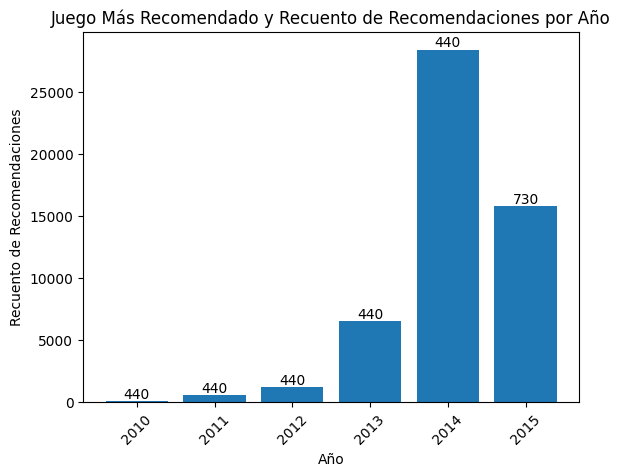

In [21]:
# Filtrar las reseñas con recomendaciones (True)
recommended_reviews = users_reviews[users_reviews['recommend'] == True]

# Encontrar el juego más recomendado y su recuento para cada año
most_recommended_games_by_year = recommended_reviews.groupby('posted_year')['item_id'].agg([lambda x: x.value_counts().idxmax(), 'count']).reset_index()
most_recommended_games_by_year.columns = ['posted_year', 'most_recommended_game', 'recommend_count']

# Fusionar los DataFrames para obtener el nombre del juego
recommended_reviews_with_names = recommended_reviews.merge(steam_games, on='item_id')

plt.bar(most_recommended_games_by_year['posted_year'], most_recommended_games_by_year['recommend_count'])
plt.xlabel("Año")
plt.ylabel("Recuento de Recomendaciones")
plt.title("Juego Más Recomendado y Recuento de Recomendaciones por Año")
plt.xticks(rotation=45)

# Etiquetas de datos en las barras
for i, row in most_recommended_games_by_year.iterrows():
    plt.text(row['posted_year'], row['recommend_count'], row['most_recommended_game'], ha='center', va='bottom')

plt.show()


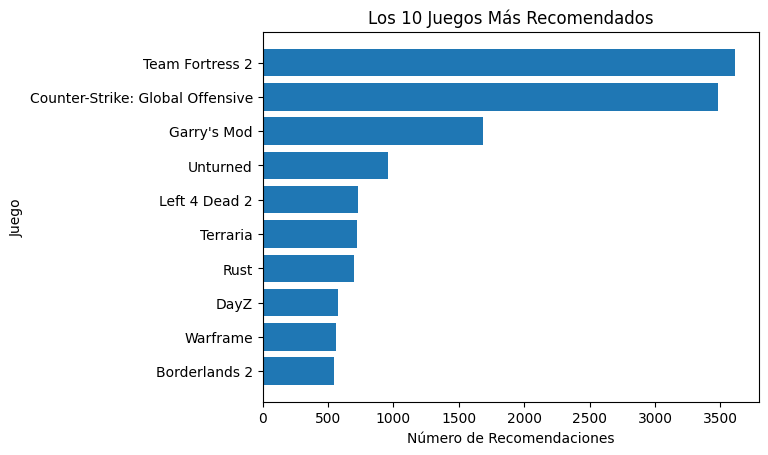

In [22]:
# Filtrar las reseñas con recomendaciones (True)
recommended_reviews = users_reviews[users_reviews['recommend'] == True]

# Encontrar los juegos más recomendados
most_recommended_games = recommended_reviews['item_id'].value_counts().reset_index()
most_recommended_games.columns = ['item_id', 'count']

# Obtener detalles de los juegos más recomendados
most_recommended_games_details = most_recommended_games.merge(steam_games, left_on='item_id', right_on='item_id')

# Eliminar duplicados y obtener los 10 primeros
most_recommended_games_details = most_recommended_games_details.drop_duplicates(subset=['item_id']).head(10)

plt.barh(most_recommended_games_details['item_name'], most_recommended_games_details['count'])
plt.xlabel("Número de Recomendaciones")
plt.ylabel("Juego")
plt.title(f"Los 10 Juegos Más Recomendados")
plt.gca().invert_yaxis()  # Invertir el eje y para que el juego más recomendado esté en la parte superior
plt.show()